# 1. 鸢尾花

&emsp;从[Scikit-learn 库中]()导入鸢尾花卉数据集(Iris)，使用 PCA 降维后保留三个主成分，然后在三维空间中画出不同类别的样本的散点图，观察样本的分布情况

In [4]:
# 加载数据
from sklearn.datasets import load_iris
import numpy as np
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names#花名

In [2]:
# PCA对X降维成三个主成分
from sklearn.decomposition import PCA  # \cite{https://scikit-learn.org.cn/view/610.html}
pca = PCA(n_components=3)
X_3d = pca.fit_transform(X)
print("三个主成分的方差贡献率: ",pca.explained_variance_ratio_)
print("三个主成分的构成: \n",pca.components_)

三个主成分的方差贡献率:  [0.92461872 0.05306648 0.01710261]
三个主成分的构成: 
 [[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]
 [-0.58202985  0.59791083  0.07623608  0.54583143]]


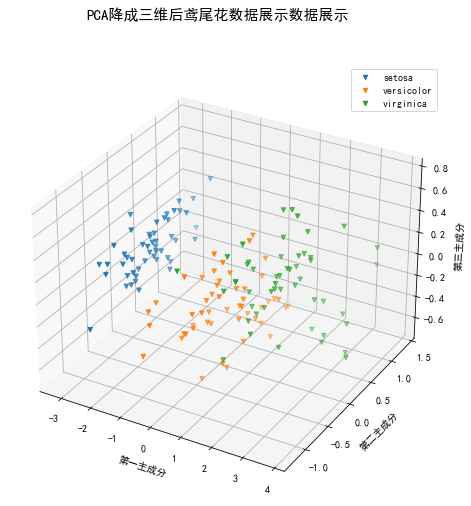

In [17]:
# 绘制图像
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['font.sans-serif'] = ["SimHei"]  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

plt.figure(figsize =(8,8))
plt.suptitle("PCA降成三维后鸢尾花数据展示数据展示",fontsize = 15)
ax = plt.subplot(projection="3d")
for i in range(0,3):
    ax.scatter(xs = list(X_3d[y==i,0]),ys = X_3d[y==i,1],zs = X_3d[y==i,2],marker = 'v',label=target_names[i])
ax.set_xlabel("第一主成分")
ax.set_ylabel("第二主成分")
ax.set_zlabel("第三主成分")
plt.legend()
plt.savefig("image/iris.png",dpi = 300,bbox_inches="tight")

由上图可知,通过主成分分析法，三种花朵较好地被分离了。其中第一主成分分离效果明显，二三主成分的分离效果较差。

# 手写字体识别对比

从Scikit-learn库中导入手写体识别数据集(Digits)，使用支持向量机作为分类模型，对比在原数据上直接使用支持向量机分类的效果和经过PCA降维后再使用支持向量机分类的效果。

In [18]:
# 数据读取
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target
X.shape

(1797, 64)

In [19]:
# PCA降维
from sklearn.decomposition import PCA
pca = PCA(n_components=0.8) #要求达到80%累计方差贡献率
X_transformed = pca.fit_transform(X)
print("各主成分的方差贡献率: ",pca.explained_variance_ratio_)
print("各主成分的构成（仅展现第一主成分）: \n",pca.components_[1])

各主成分的方差贡献率:  [0.14890594 0.13618771 0.11794594 0.08409979 0.05782415 0.0491691
 0.04315987 0.03661373 0.03353248 0.03078806 0.02372341 0.02272697
 0.01821863]
各主成分的构成（仅展现第一主成分）: 
 [ 3.27805401e-18 -1.01064569e-02 -4.90849204e-02 -9.43337493e-03
 -5.36015636e-02 -1.17755318e-01 -6.21281792e-02 -7.93574578e-03
 -1.63216259e-04 -2.10167064e-02  6.03485687e-02 -5.33769554e-03
 -9.19769205e-02 -5.19210493e-02 -5.89354684e-02 -3.33283413e-03
 -4.22872096e-05  3.62458505e-02  1.98257337e-01 -4.86386550e-02
 -2.25574894e-01 -4.50541862e-03  2.67696727e-02 -2.08735745e-04
 -5.66233953e-05  7.71235121e-02  1.88447107e-01 -1.37952518e-01
 -2.61042779e-01  4.98350596e-02  6.51113775e-02  4.03200346e-05
 -0.00000000e+00  8.81559918e-02  8.71737595e-02 -2.70860181e-01
 -2.85291800e-01  1.66461582e-01  1.27860543e-01 -0.00000000e+00
  2.89440157e-04  5.08304859e-02  1.30274463e-01 -2.68906468e-01
 -3.01575537e-01  2.40259064e-01  2.17555551e-01  1.32726068e-03
  2.86742937e-04  1.05548282e-02  1.5337

In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from hyperopt import fmin, Trials, hp, anneal
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

class digits_comparation:
    def __init__(
        self,
        model,
        X,
        y,
        params_GridSearchCV=None,
        params_hyperopt_space=None,
        test_size=797,
        train_size=1000,
        random_state=1,
    ):
        self.X = X
        self.y = y
        self.params_GridSearchCV = params_GridSearchCV
        self.params_hyperopt_space = params_hyperopt_space
        self.test_size = test_size
        self.train_size = train_size
        self.random_state = random_state
        self.X_train, self.X_test, self.y_train, self.y_test = self.data_process()
        self.pipeline = Pipeline(
            [("scaler", StandardScaler()), ("clf", model)]
        )  # 标准化后和选择的模型一起封装到pipeline中

    def data_process(self):
        return train_test_split(
            self.X,
            self.y,
            test_size=self.test_size,
            train_size=self.train_size,
            stratify=y,
            random_state=self.random_state,
        )  # 分层抽样，保证每个数字都有足够多的训练样本

    def plot_confusion_matrix(self, title, name):  # 绘制混淆矩阵并用热图格式展示
        self.y_pred = self.pipeline.predict(self.X_test)
        conf_matrix = pd.DataFrame(
            confusion_matrix(self.y_test, self.y_pred),
            index=range(0, 10),
            columns=range(0, 10),
        )
        fig, ax = plt.subplots(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 15}, cmap="Blues")
        plt.title("{}的混淆矩阵".format(title), fontsize=15)
        plt.ylabel("True label", fontsize=10)
        plt.xlabel("Predicted label", fontsize=10)
        plt.xticks(fontsize=5)
        plt.yticks(fontsize=5)
        plt.savefig("image/{}.jpg".format(name), dpi=150, bbox_inches="tight")
        plt.show()

    # hyperopt参数调优目标函数

    def object(self, params):
        pipeline = self.pipeline
        pipeline.set_params(**params)
        res = np.mean(cross_val_score(pipeline, self.X_train, self.y_train, cv=5))
        return -res

    # hyperopt参数调优具体过程

    def hyperopt_train(self, max_evals=30, algo=anneal.suggest):
        trials = Trials()
        # max_evals是搜索次数
        best_params = fmin(
            fn=self.object,
            space=self.params_hyperopt_space,
            algo=algo,
            max_evals=max_evals,
            trials=trials,
        )
        print("hyperopt调参得到最优参数: \n", best_params)
        return best_params

    def gridseachCV_train(self, scoring="accuracy", cv=5, n_jobs=-1):
        grid_search = GridSearchCV(
            estimator=self.pipeline,
            param_grid=self.params_GridSearchCV,
            scoring=scoring,
            cv=cv,
            n_jobs=n_jobs,
        )
        grid_search.fit(self.X_train, self.y_train)
        best_params = grid_search.best_params_
        print("GridSeachCV调参得到最优参数: \n", best_params)
        return best_params

    def best_model_result(self, model_name, best_params=None):
        pipeline = self.pipeline
        if best_params != None:
            pipeline.set_params(**best_params)
        pipeline.fit(self.X_train, self.y_train)
        y_pred = pipeline.predict(self.X_test)
        print(model_name + "模型准确率: ", accuracy_score(self.y_test, y_pred))
        print("最优参数下得到的混淆矩阵为: ")
        self.plot_confusion_matrix(title=model_name, name=model_name)

GridSeachCV调参得到最优参数: 
 {'clf__C': 10, 'clf__gamma': 0.002}
100%|██████████| 30/30 [00:14<00:00,  2.03trial/s, best loss: -0.977]
hyperopt调参得到最优参数: 
 {'clf__C': 13.444706513842348, 'clf__gamma': 0.0011386626606773253}
支持向量机模型准确率:  0.9874529485570891
最优参数下得到的混淆矩阵为: 


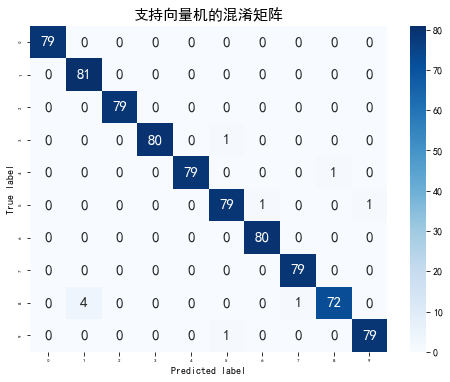

In [23]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
# 支持向量机——原数据
params_GridSearchCV = {
    "clf__gamma": (0.0005, 0.001,0.002,0.003,0.004, 0.005,0.01),
    "clf__C": (1,5,10,15,20,50,100),
}
params_hyperopt_space = {
    "clf__C": hp.loguniform("clf__C", np.log(0.01), np.log(100)),
    "clf__gamma": hp.loguniform("clf__gamma", np.log(0.00001), np.log(0.9)),
}
svm_model = digits_comparation(
    X = X,
    y = y,
    model=SVC(),
    params_GridSearchCV=params_GridSearchCV,
    params_hyperopt_space=params_hyperopt_space,
)
grid_search_param = svm_model.gridseachCV_train()
hyperopt_param = svm_model.hyperopt_train()
svm_model.best_model_result("支持向量机", best_params=grid_search_param)

GridSeachCV调参得到最优参数: 
 {'clf__C': 15, 'clf__gamma': 0.01}
100%|██████████| 30/30 [00:15<00:00,  1.95trial/s, best loss: -0.982]             
hyperopt调参得到最优参数: 
 {'clf__C': 1.5983531343016277, 'clf__gamma': 0.06284725407974971}
PCA降维后支持向量机模型准确率:  0.9761606022584692
最优参数下得到的混淆矩阵为: 


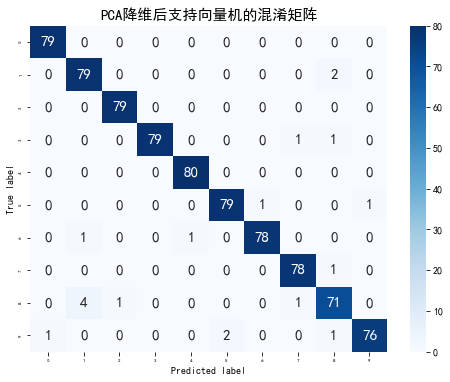

In [24]:
# 支持向量机——PCA降维后数据
params_GridSearchCV = {
    "clf__gamma": (0.0005, 0.001,0.002,0.003,0.004, 0.005,0.01),
    "clf__C": (1,5,10,15,20,50,100),
}
params_hyperopt_space = {
    "clf__C": hp.loguniform("clf__C", np.log(0.01), np.log(100)),
    "clf__gamma": hp.loguniform("clf__gamma", np.log(0.00001), np.log(0.9)),
}
svm_model = digits_comparation(
    X = X_transformed,
    y = y,
    model=SVC(),
    params_GridSearchCV=params_GridSearchCV,
    params_hyperopt_space=params_hyperopt_space,
)
grid_search_param = svm_model.gridseachCV_train()
hyperopt_param = svm_model.hyperopt_train()
svm_model.best_model_result("PCA降维后支持向量机", best_params=grid_search_param)

使用PCA降维后，训练准确率有所下降。可能是由于本问题数据的维度本来就不高，且模型复杂度和训练难度不高，因此PCA降维后非但不能解决过拟合问题，反而会由于部分信息缺失造成训练效果下降。

# 3.图片压缩

利用PCA压缩下列图片，对比保留不同比例(1%、2%、5%、10%、20%、30%)的主成分时重构的图片与原图片的异同。

照片大小 (488, 720, 3)


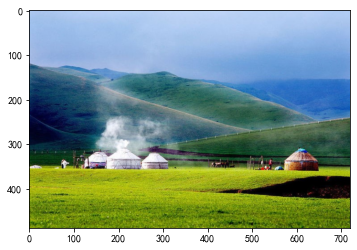

In [29]:
import numpy as np
import matplotlib.pyplot as plt
# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 读入图片
main_image = plt.imread("image/picture_of_3.jpg",0) #设置alpha通道
print("照片大小",main_image.shape)
plt.imshow(main_image)

In [30]:
from sklearn.decomposition import PCA
# PCA_For_image
def PCA_image(rate):
    result=np.zeros(main_image.shape)
    n_sigma=np.round(488*rate).astype("int")
    for channel in range(0,3):
        # PCA降维
        pca = PCA(n_components=n_sigma)
        X_transformed = pca.fit_transform(main_image[:,:,channel])
        # 还原降维后的数据到原空间
        new_image = pca.inverse_transform(X_transformed)
        result[:,:, channel] = new_image
        #归一化到[0,1]
        MAX=np.max(result[:,:,channel])
        MIN=np.min(result[:,:,channel])
        result[:,:, channel] = ((result[:,:,channel]-MIN) / (MAX-MIN))
    result=np.round(result*255).astype("int")
    return result

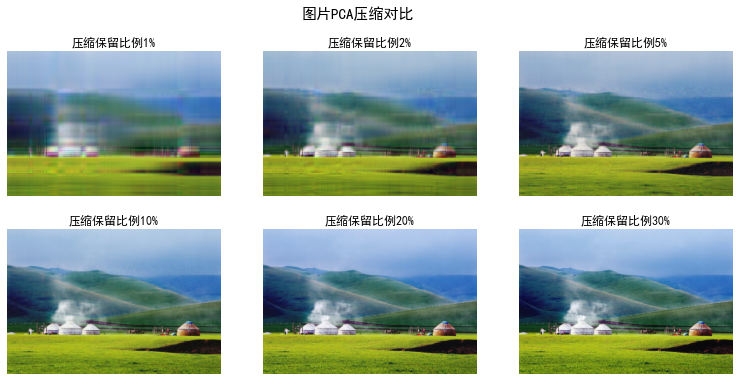

In [32]:
plt.figure(figsize =(13,6))
plt.suptitle("图片PCA压缩对比",fontsize = 15)
count = 0
for rate in (0.01,0.02,0.05,0.1,0.2,0.3):
    count += 1
    ax = plt.subplot(int("23"+str(count)))
    ax.set_title("压缩保留比例"+str(format(rate,".0%")))
    pic = PCA_image(rate)
    ax.imshow(pic)
    plt.axis("off")
plt.savefig("image/output.png",dpi=500)

保留的主成分比例越低，图像越模糊，损失的信息越多，色彩条状模糊的现象。图片在保留率 rate 的增大下，逐渐接近原图。从例图中可以看出保留 1%图像十分模糊，难以辨别。保留 10%的图像存在部分重影，但已经相对清晰。

# 4.特征脸
从Scikit-learn库中导入人脸识别数据集(fetch_lfw_people) ，使用支持向量机作为分类模型，对比在原数据上直接使用支持向量机分类的效果和经过PCA降维后再使用支持向量机分类的效果，并画出前12个主成分对应的特征脸。

In [33]:
# 数据读取
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=10) #因为支持向量机分类当有类别的样本数小于等于1时会报错
X = faces.data
y = faces.target
X.shape

(4324, 2914)

In [35]:
import pandas as pd
y = pd.DataFrame(y)
y.value_counts()

35     530
23     236
149    144
29     121
36     109
      ... 
126     10
154     10
114     10
117     10
62      10
Length: 158, dtype: int64

共有158个类别

In [2]:
# PCA降维
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9) #要求达到90%累计方差贡献率
X_transformed = pca.fit_transform(X)
print("各主成分的方差贡献率: ",pca.explained_variance_ratio_)
# print("各主成分的构成: \n",pca.components_)

各主成分的方差贡献率:  [0.21843237 0.11669235 0.07510372 0.06782737 0.03814461 0.02999958
 0.02154574 0.01841185 0.01778903 0.0157159  0.01553796 0.01398703
 0.01281374 0.01135128 0.01078316 0.00997332 0.00911026 0.00854855
 0.00771361 0.00724243 0.00647113 0.00613154 0.00583431 0.005656
 0.00536777 0.00525913 0.00504677 0.00475489 0.0045542  0.00438674
 0.0040536  0.00385643 0.00373392 0.00353424 0.00349245 0.00329792
 0.00318353 0.00309201 0.0029848  0.0029346  0.00289266 0.0028127
 0.00270968 0.00262914 0.00255358 0.00250104 0.0024927  0.00244943
 0.00226611 0.0022563  0.00222156 0.00219333 0.00212452 0.00203483
 0.00195786 0.001939   0.00190476 0.00187017 0.00181131 0.0017586
 0.00174346 0.00168534 0.00165259 0.00158462 0.00157495 0.00151627
 0.00150913 0.00148853 0.00147584 0.00143981 0.00141657 0.0013757
 0.00135048 0.00131725 0.00129368 0.00128236 0.00126313 0.00123808
 0.00121008 0.00119548 0.0011664  0.0011541  0.00113638 0.00112413
 0.00110184 0.00108899 0.00106661 0.0010474  0.0010386

In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from hyperopt import fmin, Trials, hp, anneal
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

class faces_comparation:
    def __init__(
        self,
        model,
        X,
        y,
        params_GridSearchCV=None,
        params_hyperopt_space=None,
        test_size=0.4,
        train_size=0.6,
        random_state=1,
    ):
        self.X = X
        self.y = y
        self.params_GridSearchCV = params_GridSearchCV
        self.params_hyperopt_space = params_hyperopt_space
        self.test_size = test_size
        self.train_size = train_size
        self.random_state = random_state
        self.X_train, self.X_test, self.y_train, self.y_test = self.data_process()
        self.pipeline = Pipeline(
            [("scaler", StandardScaler()), ("clf", model)]
        )  # 标准化后和选择的模型一起封装到pipeline中

    def data_process(self):
        return train_test_split(
            self.X,
            self.y,
            test_size=self.test_size,
            train_size=self.train_size,
            stratify=y,
            random_state=self.random_state,
        )  # 分层抽样，保证每个y都有足够多的训练样本

    def plot_confusion_matrix(self, title, name):  # 绘制混淆矩阵并用热图格式展示
        self.y_pred = self.pipeline.predict(self.X_test)
        conf_matrix = pd.DataFrame(
            confusion_matrix(self.y_test, self.y_pred),
            index=range(0, 10),
            columns=range(0, 10),
        )
        fig, ax = plt.subplots(figsize=(20, 15))
        sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 15}, cmap="Blues")
        plt.title("{}的混淆矩阵".format(title), fontsize=30)
        plt.ylabel("True label", fontsize=20)
        plt.xlabel("Predicted label", fontsize=20)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.savefig("image/{}.jpg".format(name), dpi=150, bbox_inches="tight")
        plt.show()

    # hyperopt参数调优目标函数

    def object(self, params):
        pipeline = self.pipeline
        pipeline.set_params(**params)
        res = np.mean(cross_val_score(pipeline, self.X_train, self.y_train, cv=5))
        return -res

    # hyperopt参数调优具体过程

    def hyperopt_train(self, max_evals=30, algo=anneal.suggest):
        trials = Trials()
        # max_evals是搜索次数
        best_params = fmin(
            fn=self.object,
            space=self.params_hyperopt_space,
            algo=algo,
            max_evals=max_evals,
            trials=trials,
        )
        print("hyperopt调参得到最优参数: \n", best_params)
        return best_params

    def gridseachCV_train(self, scoring="accuracy", cv=5, n_jobs=-1):
        grid_search = GridSearchCV(
            estimator=self.pipeline,
            param_grid=self.params_GridSearchCV,
            scoring=scoring,
            cv=cv,
            n_jobs=n_jobs,
        )
        grid_search.fit(self.X_train, self.y_train)
        best_params = grid_search.best_params_
        print("GridSeachCV调参得到最优参数: \n", best_params)
        return best_params

    def best_model_result(self, model_name, best_params=None):
        pipeline = self.pipeline
        if best_params != None:
            pipeline.set_params(**best_params)
        pipeline.fit(self.X_train, self.y_train)
        y_pred = pipeline.predict(self.X_test)
        print(model_name + "模型准确率: ", accuracy_score(self.y_test, y_pred))

In [7]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
# 支持向量机——原数据
params_GridSearchCV = {
    "clf__gamma": (0.0005, 0.001,0.002,0.003,0.004, 0.005,0.01),
    "clf__C": (1,5,10,15,20,50,100),
}
params_hyperopt_space = {
    "clf__C": hp.loguniform("clf__C", np.log(0.01), np.log(100)),
    "clf__gamma": hp.loguniform("clf__gamma", np.log(0.00001), np.log(0.9)),
}
svm_model = faces_comparation(
    X = X,
    y = y,
    model=SVC(),
    params_GridSearchCV=params_GridSearchCV,
    params_hyperopt_space=params_hyperopt_space,
)
best_param = {'clf__C': 5, 'clf__gamma': 0.0005}
# 参数调优太慢，在云端完成
# grid_search_param = svm_model.gridseachCV_train()
# hyperopt_param = svm_model.hyperopt_train()
svm_model.best_model_result("原始数据支持向量机", best_params=best_param)

原始数据支持向量机模型准确率:  0.37341040462427744


In [15]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
# 支持向量机——原数据
params_GridSearchCV = {
    "clf__gamma": (0.0005, 0.001,0.002,0.003,0.004, 0.005,0.01),
    "clf__C": (1,5,10,15,20,50,100),
}
params_hyperopt_space = {
    "clf__C": hp.loguniform("clf__C", np.log(1), np.log(5000)),
    "clf__gamma": hp.loguniform("clf__gamma", np.log(0.00001), np.log(0.9)),
}
svm_model = faces_comparation(
    X = X_transformed,
    y = y,
    model=SVC(),
    params_GridSearchCV=params_GridSearchCV,
    params_hyperopt_space=params_hyperopt_space,
)
best_param = {'clf__C': 1000, 'clf__gamma': 0.001}
# grid_search_param = svm_model.gridseachCV_train()
hyperopt_param = svm_model.hyperopt_train()
svm_model.best_model_result("PCA降维后支持向量机", best_params=hyperopt_param)

100%|██████████| 30/30 [10:12<00:00, 20.42s/trial, best loss: -0.46415292253442547]
hyperopt调参得到最优参数: 
 {'clf__C': 1739.7085667202896, 'clf__gamma': 0.0031488095843392565}
PCA降维后支持向量机模型准确率:  0.5092485549132948


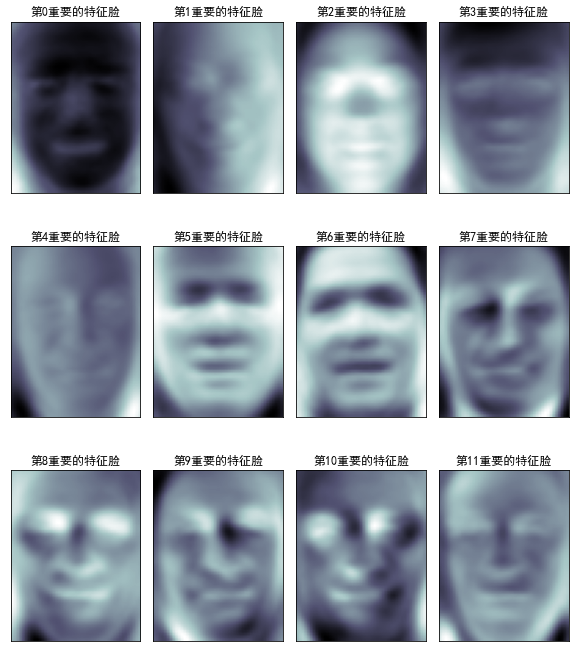

In [12]:
import matplotlib.pyplot as plt
# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
fig, axes = plt.subplots(3, 4, figsize=(10, 12),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.set_title("第{i}重要的特征脸".format(i=i))
    ax.imshow(pca.components_[:12,:][i].reshape(62, 47), cmap='bone')
plt.savefig("image/faces.png",dpi=500)

经过PCA降维后，SVM训练时间减短且训练效果大幅提升。这可能是因为在这种数据维度过高的情况下，SVM算法错误地将特例信息当成总体共有特征进行处理，导致出现严重的过拟合现象。